In [1]:
# import <needed_package_name>
import sys
import math # For Math functions
import sympy as sym # For declaring variables as symbols, make sure you have sympy installed in your system
from sympy import symbols
from sympy import *
import matplotlib.pyplot as plt

# Problem 1

We have been given a KUKA WIIA robot. We need to perform Dynamics of the robot arm.

Since the problem is same as the one we solved for homework 3 and 4 (Forward Kinematics and the Inverse Velocity Kinematics) since we've been given instructions to take values from the previous problem, hence we are going to take the information from the previous solution (HW3 + HW4)

# Solution

We have been given a seven DOF Kuka robot. We need to solve for the forward kinematics of the robot by applying the method given by Denavit-Hartenberg.

By following the rules layed out by the D-H convention of solving the problem

1. Make the zi - axes for all frames (along the axis of actuation of joint i+1)
2. The base frame is already mentioned in the problem
3. Now we need to assign the xi - axes for all frames by checking the relation between zi-1 and zi (if they are coplanar (parallel or intersect) or not coplanar)
4. After all xi - axes are assigned, we complete the frame by attaching the yi - axes to complete the Right Handed Frame rule

The co-ordinate frames are shown as below figure

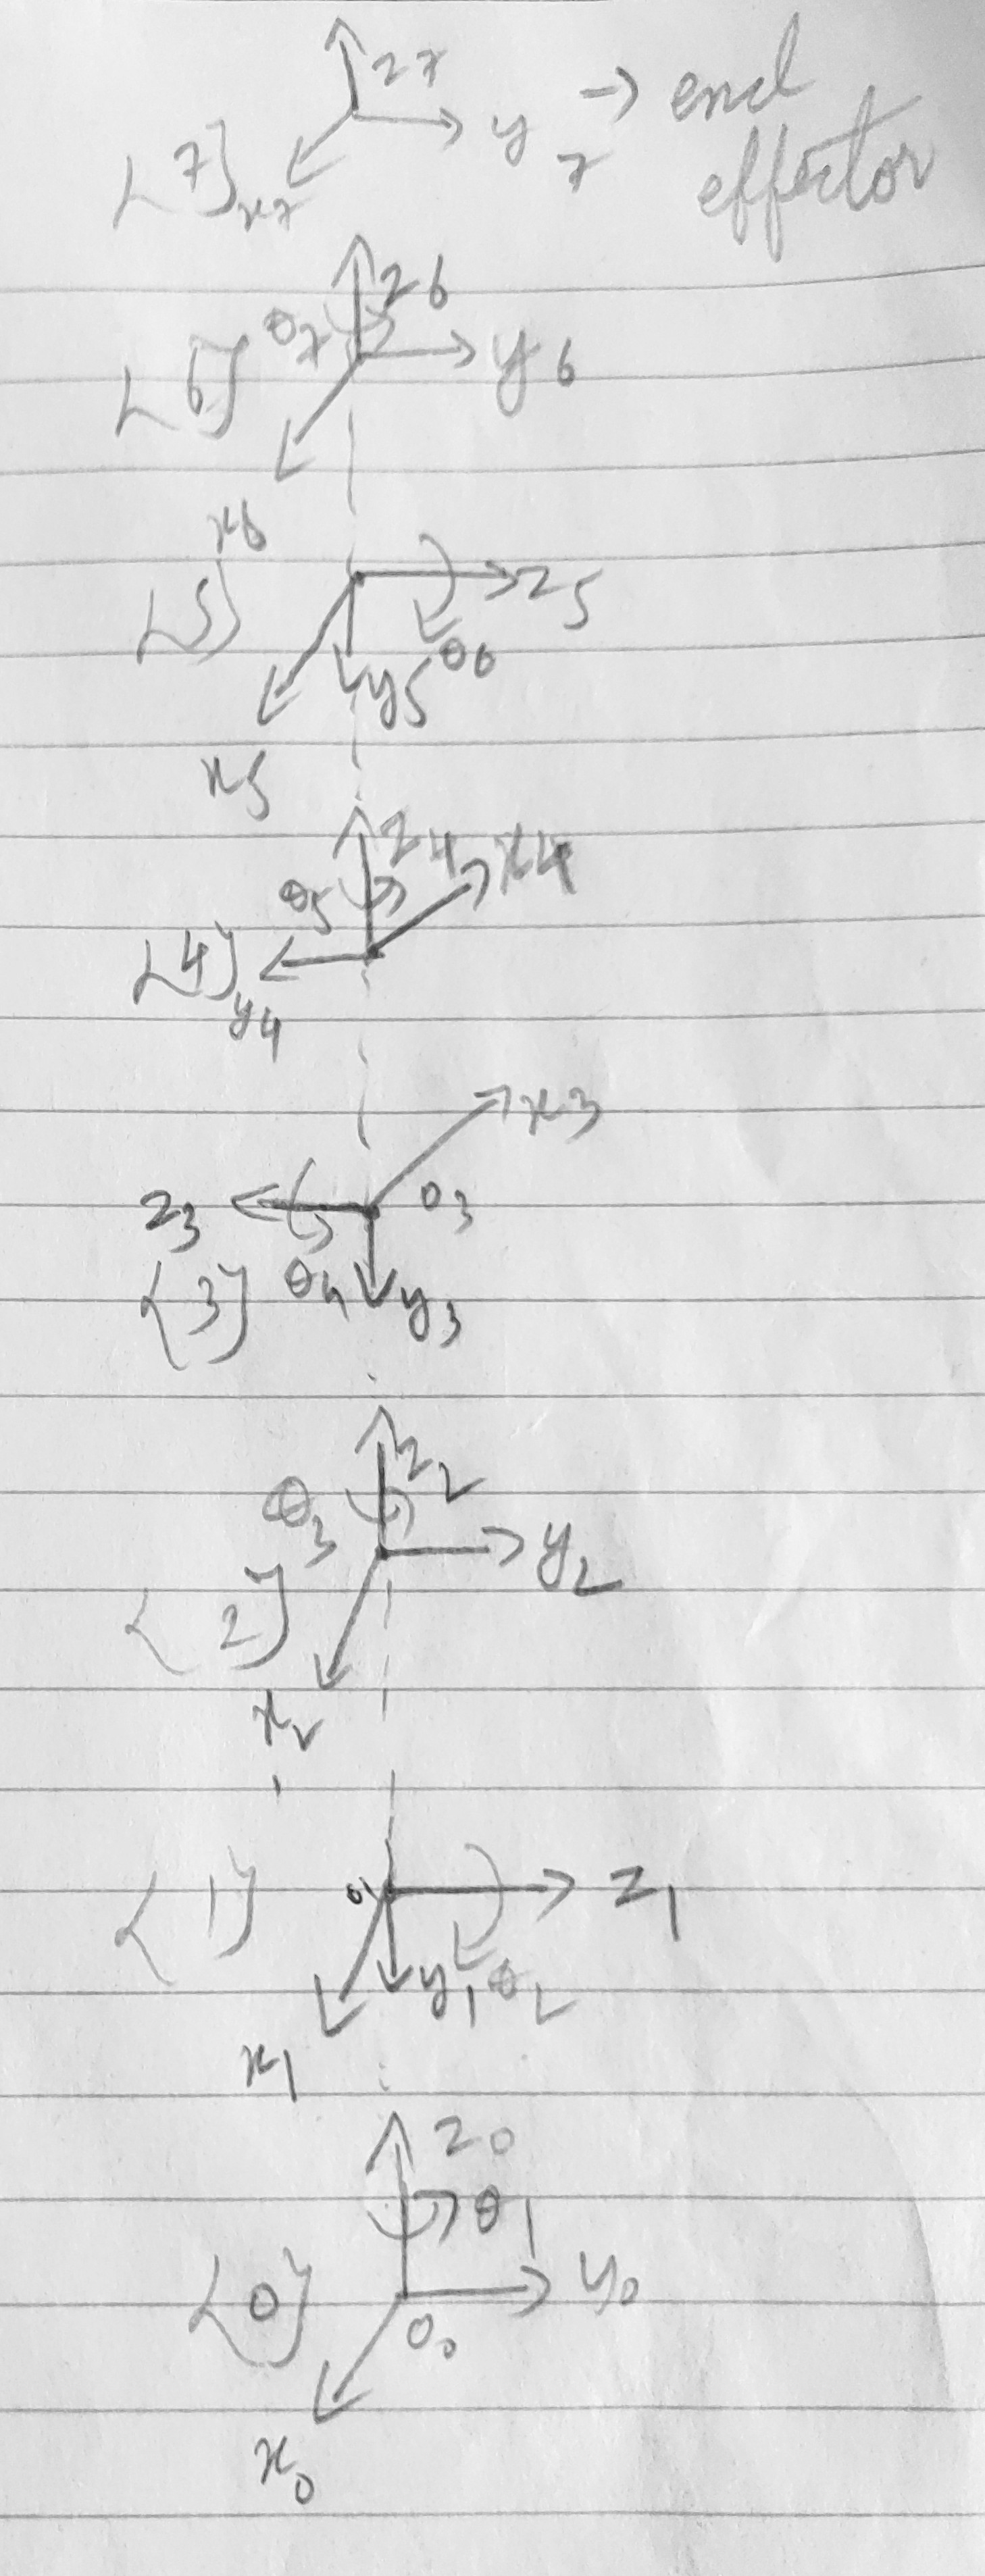

### The D-H Parameters table is mentioned as below

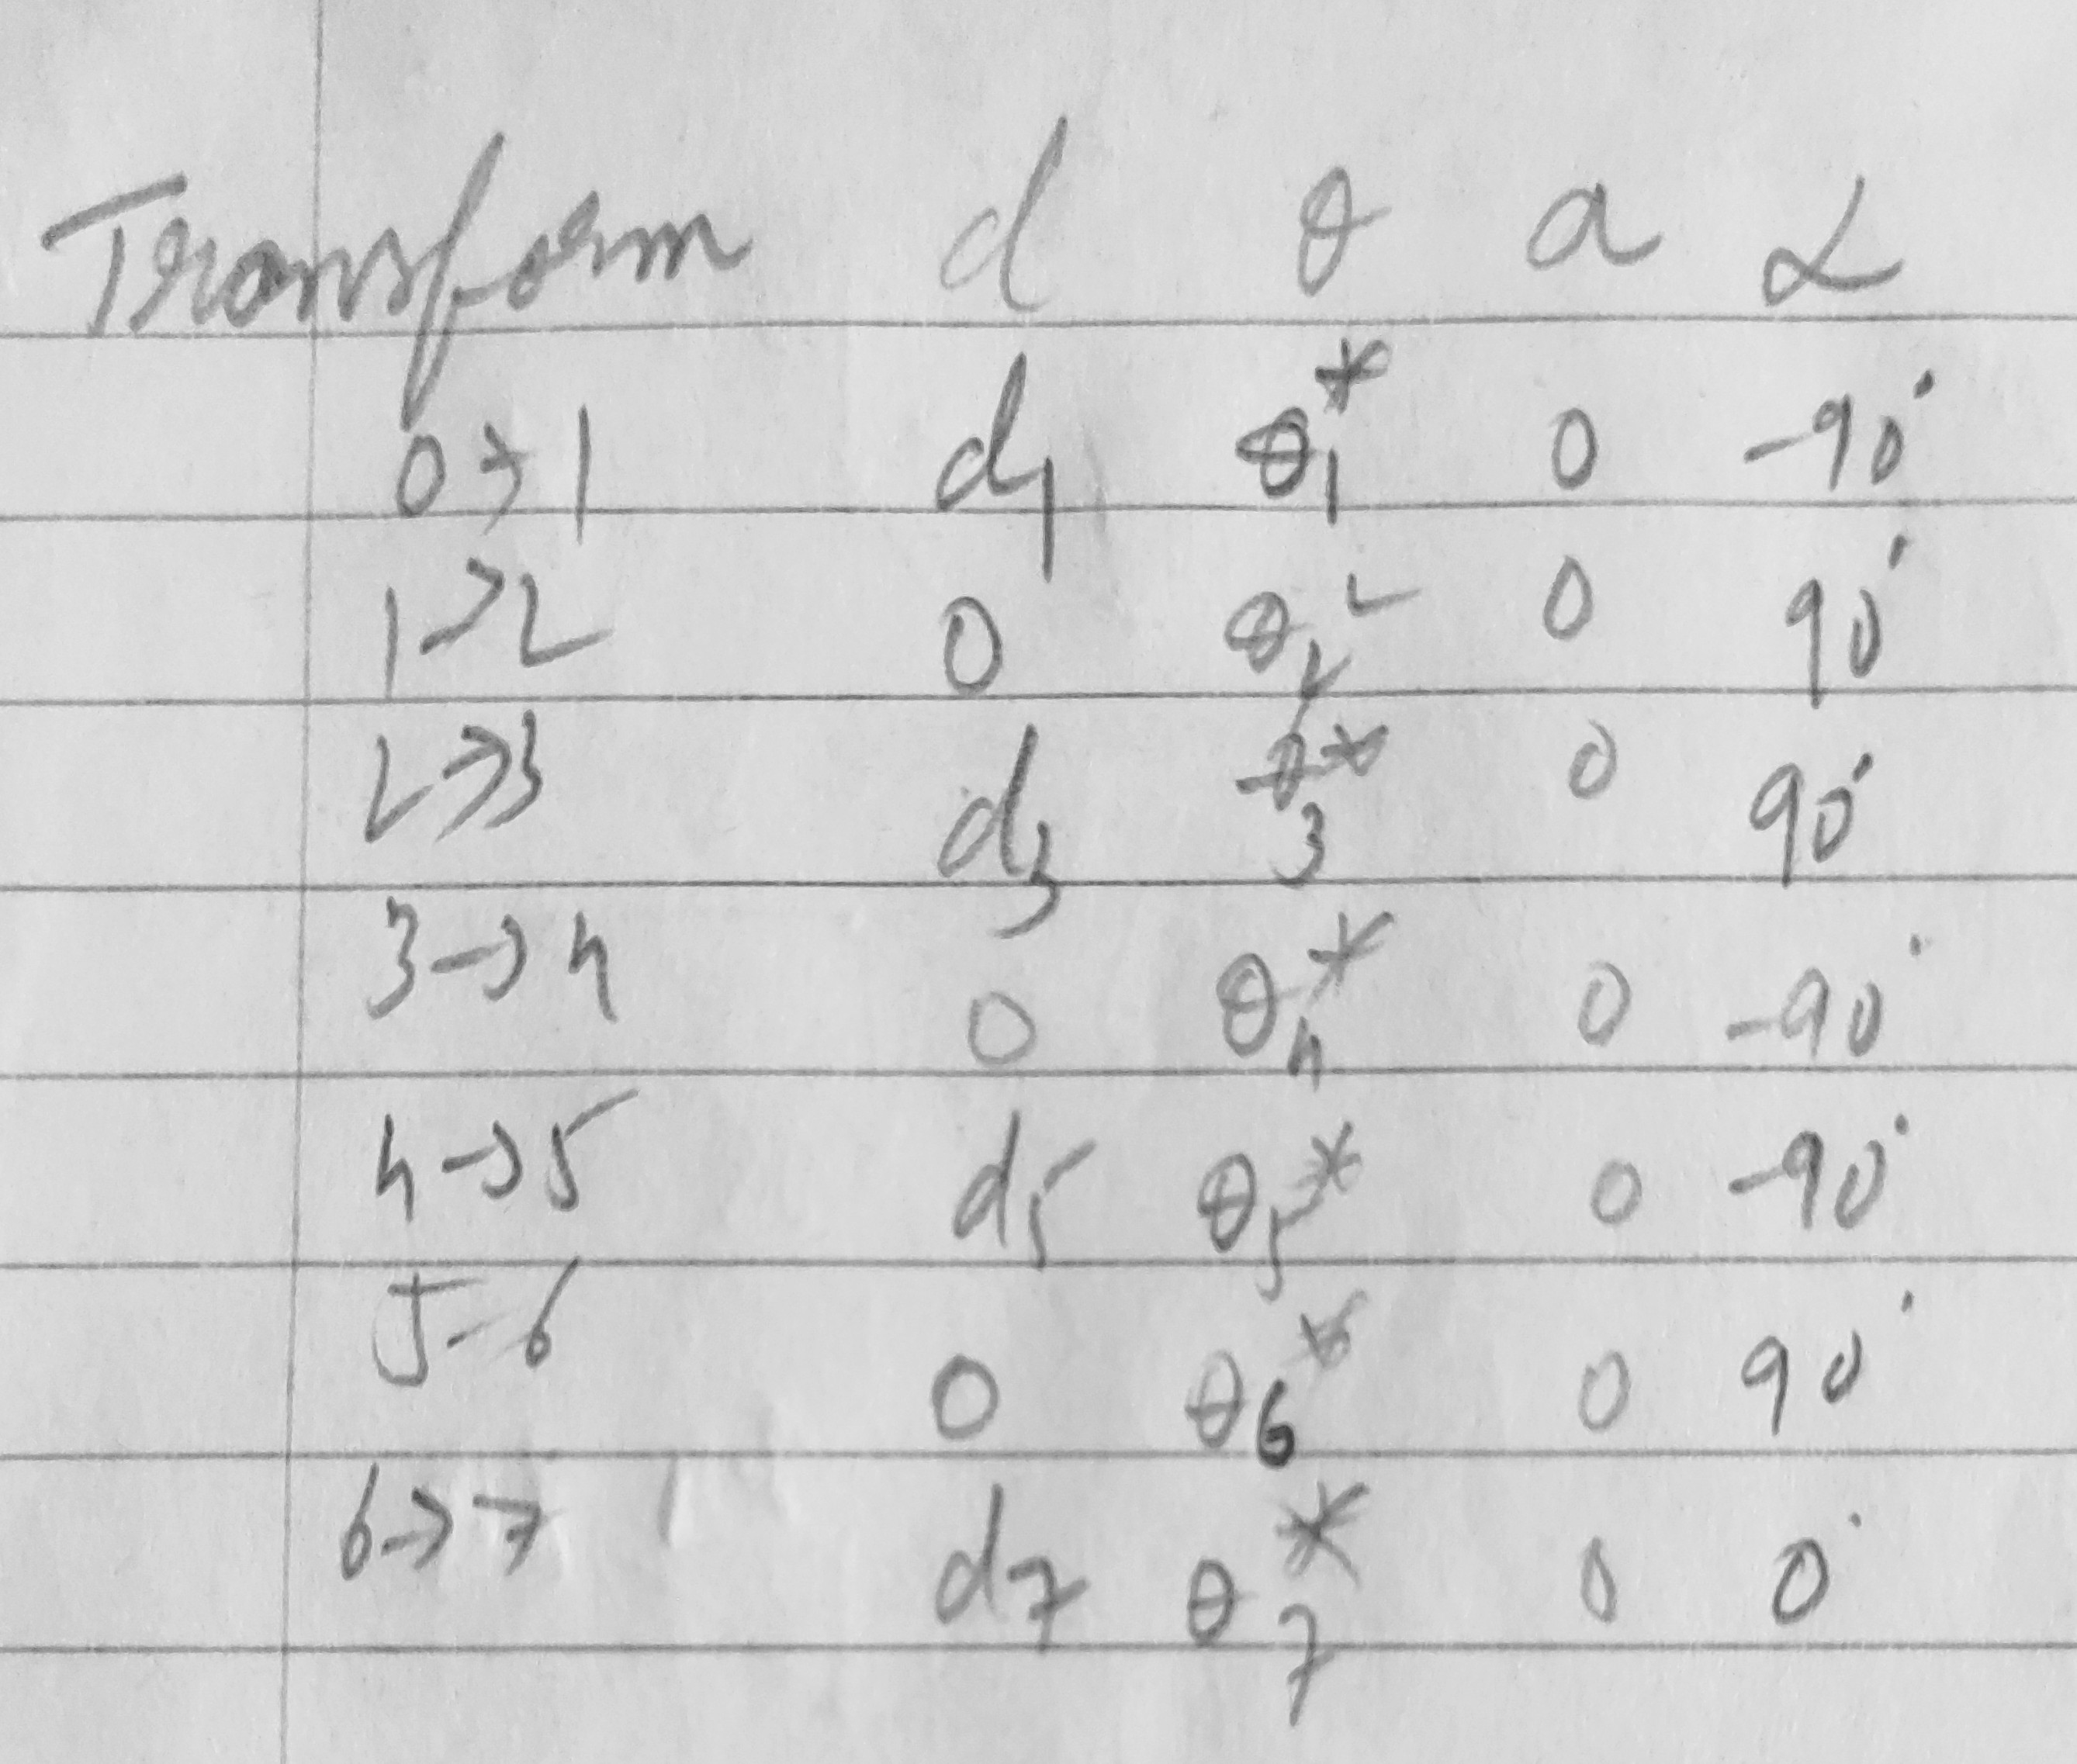

### Now we need to write the individual transformation matrices for each transformation
We know that the general form of a transformation matrix is

In [2]:
xi = symbols('theta_i')
yi = symbols('alpha_i')
di = symbols('d_i')
ai = symbols('a_i')
cxi = sym.cos(xi)
sxi = sym.sin(xi)
cyi = sym.cos(yi)
syi = sym.sin(yi)
T0_i = sym.Matrix([[cxi, -sxi*cyi, sxi*syi, ai*cxi], [sxi, cxi*cyi, -cxi*syi, ai*syi], [0, syi, cyi, di], [0, 0, 0, 1]])
T0_i

Matrix([
[cos(theta_i), -sin(theta_i)*cos(alpha_i),  sin(alpha_i)*sin(theta_i), a_i*cos(theta_i)],
[sin(theta_i),  cos(alpha_i)*cos(theta_i), -sin(alpha_i)*cos(theta_i), a_i*sin(alpha_i)],
[           0,               sin(alpha_i),               cos(alpha_i),              d_i],
[           0,                          0,                          0,                1]])

### Transformation from 0 to 1

In [3]:
x1 = symbols('x1') # Consider x1 as theta 1
d1 = symbols('d1')
c1 = sym.cos(x1)
s1 = sym.sin(x1)
T0_1 = sym.Matrix([[c1, 0, -s1, 0], [s1, 0, c1, 0], [0, -1, 0, d1], [0, 0, 0, 1]])
T0_1
#since the D-H parameter a is zero throughout, I don't mention it anywhere

Matrix([
[cos(x1),  0, -sin(x1),  0],
[sin(x1),  0,  cos(x1),  0],
[      0, -1,        0, d1],
[      0,  0,        0,  1]])

### Transformation from 1 to 2

In [4]:
x2 = symbols('x2') # Consider x2 as theta 2
d2 = symbols('d2') # d2 = 0
c2 = sym.cos(x2)
s2 = sym.sin(x2)
T1_2 = sym.Matrix([[c2, 0, s2, 0], [s2, 0, -c2, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
T1_2

Matrix([
[cos(x2), 0,  sin(x2), 0],
[sin(x2), 0, -cos(x2), 0],
[      0, 1,        0, 0],
[      0, 0,        0, 1]])

### Transformation from 0 to 2

In [5]:
T0_2 = T0_1*T1_2
T0_2

Matrix([
[cos(x1)*cos(x2), -sin(x1), sin(x2)*cos(x1),  0],
[sin(x1)*cos(x2),  cos(x1), sin(x1)*sin(x2),  0],
[       -sin(x2),        0,         cos(x2), d1],
[              0,        0,               0,  1]])

### Transformation from 2 to 3

In [6]:
x3 = symbols('x3') # Consider x3 as theta 3
d3 = symbols('d3')
c3 = sym.cos(x3)
s3 = sym.sin(x3)
T2_3 = sym.Matrix([[c3, 0, s3, 0], [s3, 0, -c3, 0], [0, 1, 0, d3], [0, 0, 0, 1]])
T2_3

Matrix([
[cos(x3), 0,  sin(x3),  0],
[sin(x3), 0, -cos(x3),  0],
[      0, 1,        0, d3],
[      0, 0,        0,  1]])

### Transformation from 0 to 3

In [7]:
T0_3 = T0_2*T2_3
T0_3

Matrix([
[-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3), sin(x2)*cos(x1), sin(x1)*cos(x3) + sin(x3)*cos(x1)*cos(x2), d3*sin(x2)*cos(x1)],
[ sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1), sin(x1)*sin(x2), sin(x1)*sin(x3)*cos(x2) - cos(x1)*cos(x3), d3*sin(x1)*sin(x2)],
[                          -sin(x2)*cos(x3),         cos(x2),                          -sin(x2)*sin(x3),    d1 + d3*cos(x2)],
[                                         0,               0,                                         0,                  1]])

### Transformation from 3 to 4

In [8]:
x4 = symbols('x4') # Consider x4 as theta 4
d4 = symbols('d4') # d4 = 0
c4 = sym.cos(x4)
s4 = sym.sin(x4)
T3_4 = sym.Matrix([[c4, 0, -s4, 0], [s4, 0, c4, 0], [0, -1, 0, 0], [0, 0, 0, 1]])
T3_4

Matrix([
[cos(x4),  0, -sin(x4), 0],
[sin(x4),  0,  cos(x4), 0],
[      0, -1,        0, 0],
[      0,  0,        0, 1]])

### Transformation from 0 to 4

In [9]:
T0_4 = T0_3*T3_4
T0_4

Matrix([
[(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1), -sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2), -(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4), d3*sin(x2)*cos(x1)],
[ (sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4), -sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3),  -(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4), d3*sin(x1)*sin(x2)],
[                                    -sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2),                            sin(x2)*sin(x3),                                       sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4),    d1 + d3*cos(x2)],
[                                                                             0,                                          0,                                                                               0,                  1]])

### Transformation from 4 to 5

In [10]:
x5 = symbols('x5') # Consider x5 as theta 5
d5 = symbols('d5')
c5 = sym.cos(x5)
s5 = sym.sin(x5)
T4_5 = sym.Matrix([[c5, 0, -s5, 0], [s5, 0, c5, 0], [0, -1, 0, d5], [0, 0, 0, 1]])
T4_5

Matrix([
[cos(x5),  0, -sin(x5),  0],
[sin(x5),  0,  cos(x5),  0],
[      0, -1,        0, d5],
[      0,  0,        0,  1]])

### Transformation from 0 to 5

In [11]:
T0_5 = T0_4*T4_5
T0_5

Matrix([
[((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5), (-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4), -((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*sin(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*cos(x5), d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4))],
[ ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5),  (sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4),  -((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*sin(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*cos(x5),  d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4))],
[                              

### Transformation from 5 to 6

In [12]:
x6 = symbols('x6') # Consider x6 as theta 6
d6 = symbols('d6') # d6 = 0
c6 = sym.cos(x6)
s6 = sym.sin(x6)
T5_6 = sym.Matrix([[c6, 0, s6, 0], [s6, 0, -c6, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
T5_6

Matrix([
[cos(x6), 0,  sin(x6), 0],
[sin(x6), 0, -cos(x6), 0],
[      0, 1,        0, 0],
[      0, 0,        0, 1]])

### Transformation from 0 to 6

In [13]:
T0_6 = T0_5*T5_6
T0_6

Matrix([
[(((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*cos(x6) + ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*sin(x6), -((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*sin(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*cos(x5), (((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6), d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4))],
[  (((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*cos(x6) + ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*sin(x6

### Transformation from 6 to 7

In [14]:
x7 = symbols('x7') # Consider x7 as theta 7
d7 = symbols('d7')
c7 = sym.cos(x7)
s7 = sym.sin(x7)
T6_7 = sym.Matrix([[c7, -s7, 0, 0], [s7, c7, 0, 0], [0, 0, 1, d7], [0, 0, 0, 1]])
T6_7

Matrix([
[cos(x7), -sin(x7), 0,  0],
[sin(x7),  cos(x7), 0,  0],
[      0,        0, 1, d7],
[      0,        0, 0,  1]])

### Now we find the total transformation matrix from 0 to 7

In [15]:
T0_7 = (T0_1)*(T1_2)*(T2_3)*(T3_4)*(T4_5)*(T5_6)*(T6_7)
T0_7

Matrix([
[((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*cos(x6) + ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*sin(x6))*cos(x7) + (-((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*sin(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*cos(x5))*sin(x7), -((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*cos(x6) + ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*sin(x6))*sin(x7) + (-((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*sin(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*cos(x5))*cos(x7), (((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(

## Now we solving the Jacobian Matrix

We know that for each Jacobian matrix for each transformation
$Ji$ = $\binom{Jv}{Jw}$ = $\binom{Z(i-1) X (O(n) - O(i-1))}{Z(i-1)}$ (For a Revolute joint)

Where $Jv$ is the Jacobian for linear velocity and $Jw$ is the Jacobian for angular velocity

And put all individual jacobians together and form the final Jacobian Matrix from o to n 
$$
\mathbf{J^{0}_7}
=
\begin{pmatrix}
J1 & J2 & J3 & J4 & J5 & J6 & J7
\end{pmatrix}
$$

#### So now we find the following
1. vectors O1, O2, O3, O4, O5, O6 and O7 (i.e On)
2. $r_i$ where i = 1 to n = $On - O(i-1)$
2. vectors z0, z1, z2, z3, z4, z5, z6

In [16]:
On = sym.Matrix(T0_7.col(3)[0:3]) #Same as O7
On

Matrix([
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[   d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                                                              d1 + d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) +

In [17]:
O0 = sym.Matrix([0, 0, 0])
O0

Matrix([
[0],
[0],
[0]])

In [18]:
O1 = sym.Matrix(T0_1.col(3)[:3])
O1

Matrix([
[ 0],
[ 0],
[d1]])

In [19]:
O2 = sym.Matrix(T0_2.col(3)[:3])
O2

Matrix([
[ 0],
[ 0],
[d1]])

In [20]:
O3 = sym.Matrix(T0_3.col(3)[:3])
O3

Matrix([
[d3*sin(x2)*cos(x1)],
[d3*sin(x1)*sin(x2)],
[   d1 + d3*cos(x2)]])

In [21]:
O4 = sym.Matrix(T0_4.col(3)[:3])
O4

Matrix([
[d3*sin(x2)*cos(x1)],
[d3*sin(x1)*sin(x2)],
[   d1 + d3*cos(x2)]])

In [22]:
O5 = sym.Matrix(T0_5.col(3)[:3])
O5

Matrix([
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4))],
[ d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4))],
[                                         d1 + d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4))]])

In [23]:
O6 = sym.Matrix(T0_6.col(3)[:3])
O6

Matrix([
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4))],
[ d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4))],
[                                         d1 + d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4))]])

In [24]:
r1 = On-O0
r1

Matrix([
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[   d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                                                              d1 + d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) +

In [25]:
r2 = On-O1
r2

Matrix([
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[   d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                                                                   d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) +

In [26]:
r3 = On-O2
r3

Matrix([
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[   d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                                                                   d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) +

In [27]:
r4 = On-O3
r4

Matrix([
[d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[   d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                                                           d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) -

In [28]:
r5 = On-O4
r5

Matrix([
[d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[   d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                                                           d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) -

In [29]:
r6 = On-O5
r6

Matrix([
[d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[  d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                     d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6))]])

In [30]:
r7 = On-O6
r7

Matrix([
[d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[  d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[                                                                                                     d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6))]])

In [31]:
z0 = sym.Matrix([0, 0, 1])
z0

Matrix([
[0],
[0],
[1]])

In [32]:
z1 = sym.Matrix(T0_1.col(2)[:3])
z1

Matrix([
[-sin(x1)],
[ cos(x1)],
[       0]])

In [33]:
z2 = sym.Matrix(T0_2.col(2)[:3])
z2

Matrix([
[sin(x2)*cos(x1)],
[sin(x1)*sin(x2)],
[        cos(x2)]])

In [34]:
z3 = sym.Matrix(T0_3.col(2)[:3])
z3

Matrix([
[sin(x1)*cos(x3) + sin(x3)*cos(x1)*cos(x2)],
[sin(x1)*sin(x3)*cos(x2) - cos(x1)*cos(x3)],
[                         -sin(x2)*sin(x3)]])

In [35]:
z4 = sym.Matrix(T0_4.col(2)[:3])
z4

Matrix([
[-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)],
[ -(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)],
[                                      sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)]])

In [36]:
z5 = sym.Matrix(T0_5.col(2)[:3])
z5

Matrix([
[-((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*sin(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*cos(x5)],
[ -((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*sin(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*cos(x5)],
[                                                                 -(-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*sin(x5) + sin(x2)*sin(x3)*cos(x5)]])

In [37]:
z6 = sym.Matrix(T0_6.col(2)[:3])
z6

Matrix([
[(((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6)],
[  (((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)],
[                                                                                                     ((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)]])

Now we compute the cross product of $Z(i-1)$ and $ri$ and complete the following Jacobian Matrix for each transformation
$Ji$ = $\binom{Jv}{Jw}$ = $\binom{Z(i-1) X ri}{Z(i-1)}$

### Calculating J1

Z*0 X r*1

In [38]:
Jv1 = z0.cross(r1)
Jv1

Matrix([
[  -d3*sin(x1)*sin(x2) - d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) - d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[                                                                                                                                                                                                                                                                            

In [39]:
Jw1 = z0
J1 = Jv1.col_join(Jw1)
J1

Matrix([
[  -d3*sin(x1)*sin(x2) - d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) - d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))],
[d3*sin(x2)*cos(x1) + d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) + sin(x2)*cos(x1)*cos(x4)) + d7*((((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6))],
[                                                                                                                                                                                                                                                                            

### Calculating J2

Z1 X r2

In [40]:
Jv2 = z1.cross(r2)
Jv2

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   (d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*cos(x1)],
[                                                                                                                                                                                                                                                           

In [41]:
Jw2 = z1
J2 = Jv2.col_join(Jw2)
J2

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   (d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*cos(x1)],
[                                                                                                                                                                                                                                                           

### Calculating J3

Z2 X r3

In [42]:
Jv3 = z2.cross(r3)
Jv3

Matrix([
[                                                                                                                                                           (d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*sin(x1)*sin(x2) - (d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)))*cos(x2)],
[                                                                                                                                                       -(d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3

In [43]:
Jw3 = z2
J3 = Jv3.col_join(Jw3)
J3

Matrix([
[                                                                                                                                                           (d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*sin(x1)*sin(x2) - (d3*sin(x1)*sin(x2) + d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)))*cos(x2)],
[                                                                                                                                                       -(d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3

### Calculating J4

Z3 X r4

In [44]:
Jv4 = z3.cross(r4)
Jv4

Matrix([
[                                                                                                                                                                        (d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)))*sin(x2)*sin(x3) + (d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*(sin(x1)*sin(x3)*cos(x2) - cos(x1)*cos(x3))],
[                                                                                                                                                                    -(d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x

In [45]:
Jw4 = z3
J4 = Jv4.col_join(Jw4)
J4

Matrix([
[                                                                                                                                                                        (d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)))*sin(x2)*sin(x3) + (d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*(sin(x1)*sin(x3)*cos(x2) - cos(x1)*cos(x3))],
[                                                                                                                                                                    -(d5*(-(-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x

### Calculating J5

Z4 X r5

In [46]:
Jv5 = z4.cross(r5)
Jv5

Matrix([
[                                                                                                                                                                                 -(d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)))*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + (d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4))],
[                                                                                                                                                  

In [47]:
Jw5 = z4
J5 = Jv5.col_join(Jw5)
J5

Matrix([
[                                                                                                                                                                                 -(d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) + d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)))*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + (d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6)))*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4))],
[                                                                                                                                                  

### Calculating J6

Z5 X r6

In [48]:
Jv6 = z5.cross(r6)
Jv6

Matrix([
[                                                                                                                                                                      -d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))*(-(-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*sin(x5) + sin(x2)*sin(x3)*cos(x5)) + d7*(-((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*sin(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*cos(x5))*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6))],
[                                                                                                                                                                    d7*((((-sin(x1)*sin(x3) + cos

In [49]:
Jw6 = z5
J6 = Jv6.col_join(Jw6)
J6

Matrix([
[                                                                                                                                                                      -d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6))*(-(-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*sin(x5) + sin(x2)*sin(x3)*cos(x5)) + d7*(-((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*sin(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*cos(x5))*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos(x5) + sin(x2)*sin(x3)*sin(x5))*sin(x6) - (-sin(x2)*sin(x4)*cos(x3) - cos(x2)*cos(x4))*cos(x6))],
[                                                                                                                                                                    d7*((((-sin(x1)*sin(x3) + cos

### Calculating J7

Z6 X r7

In [50]:
Jv7 = z6.cross(r7)
Jv7

Matrix([
[0],
[0],
[0]])

In [51]:
Jw7 = z6
J7 = Jv7.col_join(Jw7)
J7

Matrix([
[                                                                                                                                                                                                                                                   0],
[                                                                                                                                                                                                                                                   0],
[                                                                                                                                                                                                                                                   0],
[(((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*cos(x4) + sin(x2)*sin(x4)*cos(x1))*cos(x5) + (-sin(x1)*cos(x3) - sin(x3)*cos(x1)*cos(x2))*sin(x5))*sin(x6) - ((-sin(x1)*sin(x3) + cos(x1)*cos(x2)*cos(x3))*sin(x4) - sin(x2)*cos(x1)*cos(x4))*cos(x6)],

The final Jacobian Matrix is obtained as follows
$J^{0}_7$ = $(J1, J2, J3, J4, J5, J6, J7)$

In [52]:
J = J1.row_join(J2).row_join(J4).row_join(J5).row_join(J6).row_join(J7)
J
# Since we know that the joint 3 is locked, we can eliminate that to get a 6*6 square matrix

Matrix([
[  -d3*sin(x1)*sin(x2) - d5*(-(sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) + sin(x1)*sin(x2)*cos(x4)) - d7*((((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*cos(x4) + sin(x1)*sin(x2)*sin(x4))*cos(x5) + (-sin(x1)*sin(x3)*cos(x2) + cos(x1)*cos(x3))*sin(x5))*sin(x6) - ((sin(x1)*cos(x2)*cos(x3) + sin(x3)*cos(x1))*sin(x4) - sin(x1)*sin(x2)*cos(x4))*cos(x6)),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    (d3*cos(x2) + d5*(sin(x2)*sin(x4)*cos(x3) + cos(x2)*cos(x4)) + d7*(((-sin(x2)*cos(x3)*cos(x4) + sin(x4)*cos(x2))*cos

### We know from the problem statement the joint variables of the robot. Lets us substitute the value in the Jacobian matrix

## Now lets solve for the Dynamics in the problem

In [53]:
T0_7 = T0_7.subs(x3,0).subs(d1,0.360).subs(d3,0.420).subs(d5,0.3995).subs(d7,0.2055)
J = J.subs(x3,0).subs(d1,0.360).subs(d3,0.420).subs(d5,0.3995).subs(d7,0.2055)
#Substituting the third joint values to be equal to 0

In [54]:
q = sym.Matrix([math.pi/2, 0, -math.pi/2, 0.1*(math.pi/180), 0.1*(math.pi/180), 0]) #initial values of the joint angles

#The masses of the links are as obtained from the Kuka robot datasheet
m1 = 3.95
m2 = 6.95 #since joint 3 is lockes, its mass is added to link 2
m4 = 3.01
m5 = 3.01 #Mean of masses of link 4 and 5
m6 = 1.87
m7 = 1.87 #Mean of masses of link 4 and 5
g = 9.81 #the acceleration due to gravity

#Position of centre of gravity
cg1 = sym.Matrix([0,0,0.18,1])
cg2 = sym.Matrix([0,0.21,0,1])
cg4 = sym.Matrix([0,-0.1997,0,1])
cg5 = sym.Matrix([0,0,0.1997,1])
cg6 = sym.Matrix([0,0.05275,0,1])
cg7 = sym.Matrix([0,0,0.05275,1])

#Transformations of centre of gravity positions
LG2 = T0_1*cg2
LG4 = T0_3*cg4
LG5 = T0_4*cg5
LG6 = T0_5*cg6
LG7 = T0_6*cg7

#finding the potential energy
PE = g * (m1*LG1[2] + m2*LG2[2] + m4*LG4[2] + m5*LG5[2] + m6*LG6[2] + m7*LG7[2]) #m*g*h

#The gravity matrix is given by
Grav = sym.Matrix([diff(PE,x1), diff(PE,x2), diff(PE,x4), diff(PE,x5), diff(PE,x6), diff(PE,x7)])

#Force is given as 5N in the Y-axis (-ve direction)
F = sym.Matrix([ 0, -5, 0, 0, 0, 0])

#initiating empty lists for the x and z co-ordinates of the end effector (will be used when plotting the graph)
X = []
Z = []

#initializing empty list for the no. of parts the circle is divided into
parts = []

#initializing empty list to store the torque calculated for each joint
T1 = []
T2 = []
T4 = []
T5 = []
T6 = []
T7 = []

#Now lets perform the calculations for the inverse kinematics and perform dynamics by breaking the circle into 200 parts
for i in range (200):
    ti = math.pi/2 + ( (2*math.pi)*(i) )/200 #initial position of the angle
    tf = math.pi/2 + ( (2*math.pi)*(i+1) )/200 #new position of the angle
    #Substituting the values for the joint angles to find the final transformation matrix for this iteration
    Trans07 = T0_7.subs(x1,q[0,0]).subs(x2,q[1,0]).subs(x4,q[2,0]).subs(x5,q[3,0]).subs(x6,q[4,0]).subs(x7,q[5,0])
    
    #Position of the end effector (the pen)
    P7 = sym.Matrix([0, 0, 0.1, 1])
    P = Trans07*P7
    
    #Slicing the X and z values from here and storing them in the list initialized previously
    X.append(P[0,0])
    Z.append(P[2,0])
    
    #Finding the jacobian of this iteration
    Jacobian = J.subs(x1,q[0,0]).subs(x2,q[1,0]).subs(x4,q[2,0]).subs(x5,q[3,0]).subs(x6,q[4,0]).subs(x7,q[5,0])
    
    #Finding the gravity matrix for this iteration
    Gravity = Grav.subs(x1,q[0,0]).subs(x2,q[1,0]).subs(x4,q[2,0]).subs(x5,q[3,0]).subs(x6,q[4,0]).subs(x7,q[5,0])
    
    #Finding the transpose of the Jacobian
    JT = sym.Transpose(Jacobian)
    
    #Finding and simplifying the inverse of the Jacobian
    Jinv = simplify(Jacobian.inv('GE'))
    
    #Calculating the torque vector
    Tau = Gravity - JT*F
    
    #storing these torques for each joint in separate lists initialized above
    T1.append(Tau[0,0])
    T2.append(Tau[1,0])
    T4.append(Tau[2,0])
    T5.append(Tau[3,0])
    T6.append(Tau[4,0])
    T7.append(Tau[5,0])
    
    #Storing the no. of parts in the list initialized above
    parts.append(i)
    
    #The difference in the end effector position between the two successive parts
    end1= sym.Matrix([0.100*sym.cos(ti), 0, 0.100*sym.sin(ti), 0, 0, 0])
    end2= sym.Matrix([0.100*sym.cos(tf), 0, 0.100*sym.sin(tf), 0, 0, 0])

    delta = end2-end1

    #Update the joint variable for the next iteration
    q = q + Jinv*delta

### Now lets plot the graphs

In [ ]:

plt.title('Circle')
plt.grid()
plt.ylabel('z')
plt.xlabel('x')
plt.plot(X,Z)
plt.axis("equal")
plt.pause(0.05)
plt.show()



In [ ]:
# Plot torque vs time values for joints
plt.title('Joint 1')
plt.ylim(-5,5)
plt.grid()
plt.ylabel('Tau1(Nm)')
plt.xlabel('time(s)')
plt.plot(parts,T1)
plt.pause(0.05)
plt.show()



Matrix([
[    1.5707963267949],
[                  0],
[   -1.5707963267949],
[0.00174532925199433],
[0.00174532925199433],
[                  0]])

In [ ]:
plt.title('Joint 2')   
plt.ylim(10,30)
plt.grid()
plt.ylabel('Tau2(Nm)')
plt.xlabel('time(s)')
plt.plot(parts,T2)
plt.pause(0.05)
plt.show()  

In [ ]:
plt.title('Joint 4')
plt.ylim(-30,-10)
plt.grid()
plt.ylabel('Tau4(Nm)')
plt.xlabel('time(s)')
plt.plot(parts,T4)
plt.pause(0.05)
plt.show()   



In [ ]:
plt.title('Joint 5')
plt.ylim(-5,5)
plt.grid()
plt.ylabel('Tau5(Nm)')
plt.xlabel('time(s)')
plt.plot(parts,T5)
plt.pause(0.05)
plt.show()   



In [ ]:
plt.title('Joint 6')
plt.ylim(-2,2)
plt.grid()
plt.ylabel('Tau6(Nm)')
plt.xlabel('time(s)')
plt.plot(parts,T6)
plt.pause(0.05)
plt.show()   


In [ ]:

plt.title('Joint 7')
plt.ylim(-5,5)
plt.grid()
plt.ylabel('Tau7(Nm)')
plt.xlabel('time(s)')
plt.plot(parts,T7)
plt.pause(0.05)
plt.show()